In [1]:
#lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\User\Desktop\Akshay project\Data set\database_IND.csv"
import chardet
with open (path,'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [3]:
data = pd.read_csv(path,encoding = 'ascii')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [5]:
data.shape

(908, 25)

In [6]:
#Here we get to know that some columns have 0 values. So we will go ahead and drop those columns

In [7]:
data = data.drop(columns = ['other_fuel3','wepp_id','estimated_generation_gwh'])
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [8]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [9]:
# Also the data has country name and country tag which is not required since all the values is INDIA. So dropping that too.

In [10]:
data = data.drop(columns = ['country','country_long'])
data.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    object 
 1   gppd_idnr               908 non-null    object 
 2   capacity_mw             908 non-null    float64
 3   latitude                862 non-null    float64
 4   longitude               862 non-null    float64
 5   primary_fuel            908 non-null    object 
 6   other_fuel1             199 non-null    object 
 7   other_fuel2             1 non-null      object 
 8   commissioning_year      528 non-null    float64
 9   owner                   342 non-null    object 
 10  source                  908 non-null    object 
 11  url                     908 non-null    object 
 12  geolocation_source      889 non-null    object 
 13  year_of_capacity_data   520 non-null    float64
 14  generation_gwh_2013     384 non-null    fl

In [12]:
# We will drop the url,gppd_idnr, owner also which isnt required

In [13]:
data = data.drop(columns = ['url','gppd_idnr','owner'])
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [14]:
#We will check null values
data.isna().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               907
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [15]:
# We will remove which has more number of null values
data = data.drop(columns = ['other_fuel1','other_fuel2'])
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    object 
 1   capacity_mw             908 non-null    float64
 2   latitude                862 non-null    float64
 3   longitude               862 non-null    float64
 4   primary_fuel            908 non-null    object 
 5   commissioning_year      528 non-null    float64
 6   source                  908 non-null    object 
 7   geolocation_source      889 non-null    object 
 8   year_of_capacity_data   520 non-null    float64
 9   generation_gwh_2013     384 non-null    float64
 10  generation_gwh_2014     401 non-null    float64
 11  generation_gwh_2015     425 non-null    float64
 12  generation_gwh_2016     437 non-null    float64
 13  generation_gwh_2017     443 non-null    float64
 14  generation_data_source  450 non-null    ob

In [17]:
#We will treat the missing values in this.
data['latitude'].fillna(data['latitude'].mean(),inplace=True)
data['longitude'].fillna(data['longitude'].mean(),inplace=True)
data['commissioning_year'].fillna(data['commissioning_year'].median(), inplace=True)
data['generation_gwh_2013'].fillna(data['generation_gwh_2013'].mean(), inplace=True)
data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean(), inplace=True)
data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean(), inplace=True)
data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean(), inplace=True)
data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean(), inplace=True)
data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mean(),inplace=True)

In [18]:
data.isna().sum()

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
source                      0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    458
dtype: int64

In [19]:
#Lets drop name, geolocation source and generation data source which arent required to train our model

In [20]:
data = data.drop(columns = ['generation_data_source','geolocation_source','name'])
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,2000.0,Ultratech Cement ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [21]:
data.value_counts('primary_fuel')

primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
dtype: int64

In [22]:
# label encoding to clean up categorical data
categorical_data = { 
    'primary_fuel': {'Coal':0, 'Hydro':1, 'Solar':2, 'Wind':3, 'Gas':4, 'Biomass':5, 'Oil':6, 'Nuclear':7}, }
data = data.replace(categorical_data)
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2,2011.0,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,0,2000.0,Ultratech Cement ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,3,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,4,2004.0,Central Electricity Authority,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,0,2015.0,Central Electricity Authority,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,0,2016.0,Central Electricity Authority,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,2,2000.0,Karnataka Power Corporation Limited,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,3,2000.0,CDM,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,0,2000.0,Hindustan Zinc ltd,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [26]:
#Lets drop the source column
data = data.drop(columns = ['source'])
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2,2011.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,0,2000.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,3,2000.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,4,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,0,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


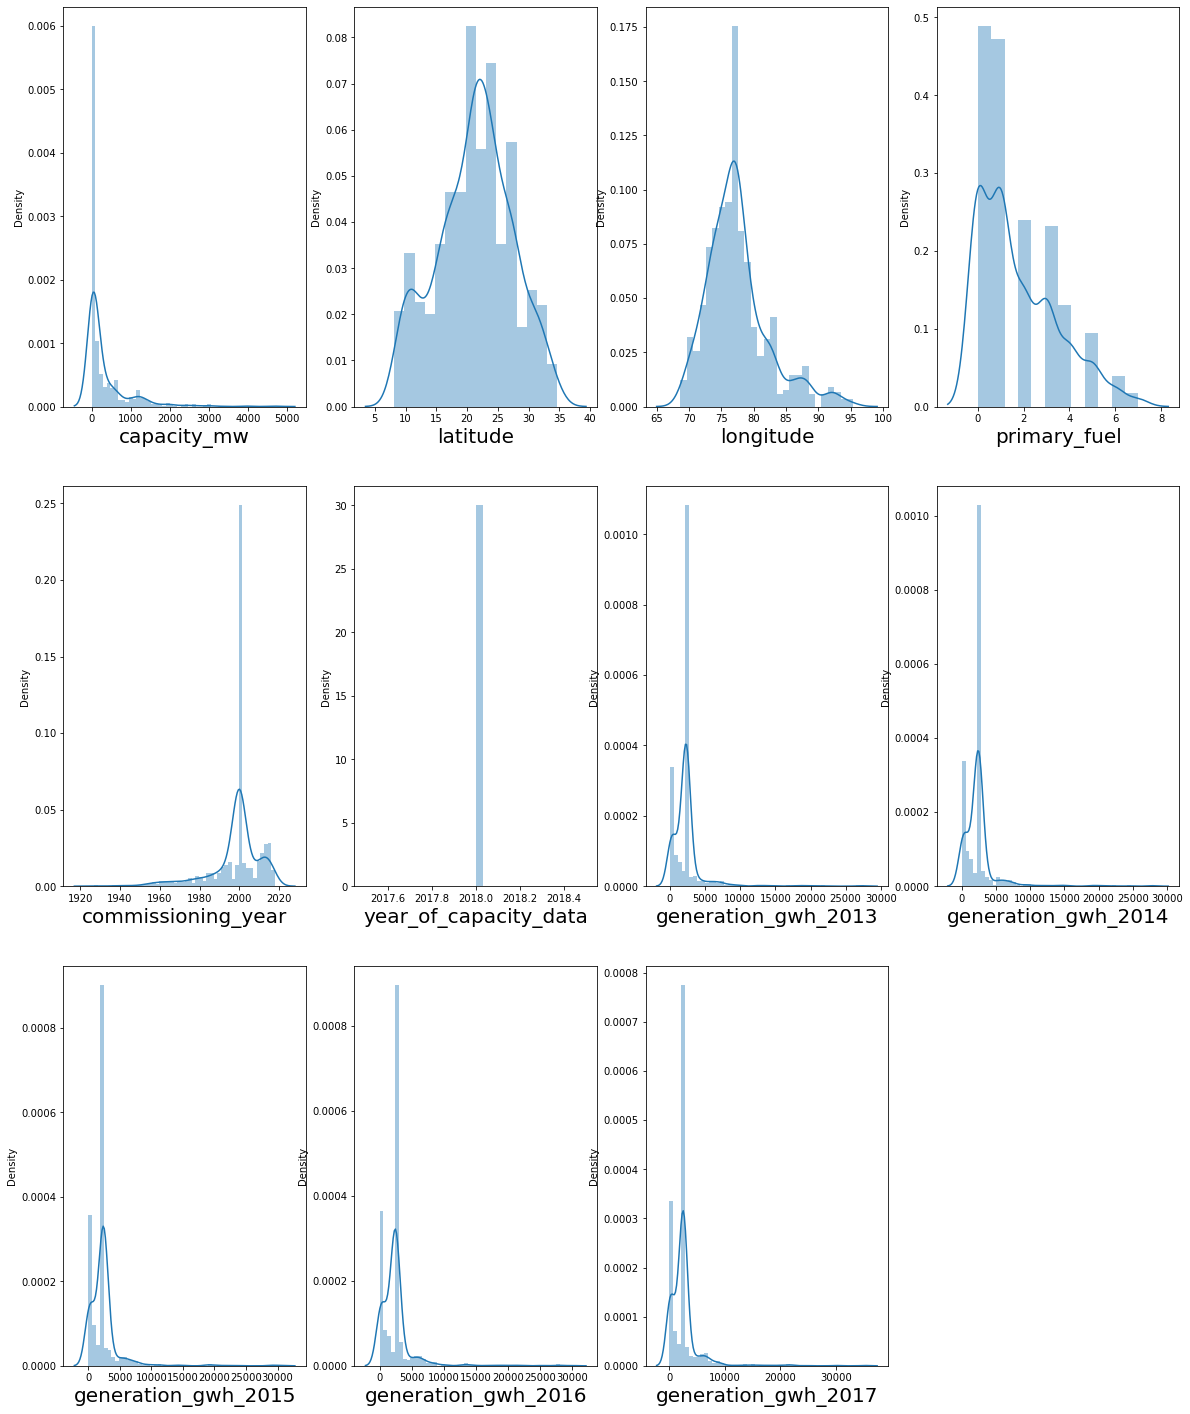

In [27]:
#Lets check how the data is distributed for every coulumn
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=12 :
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()  

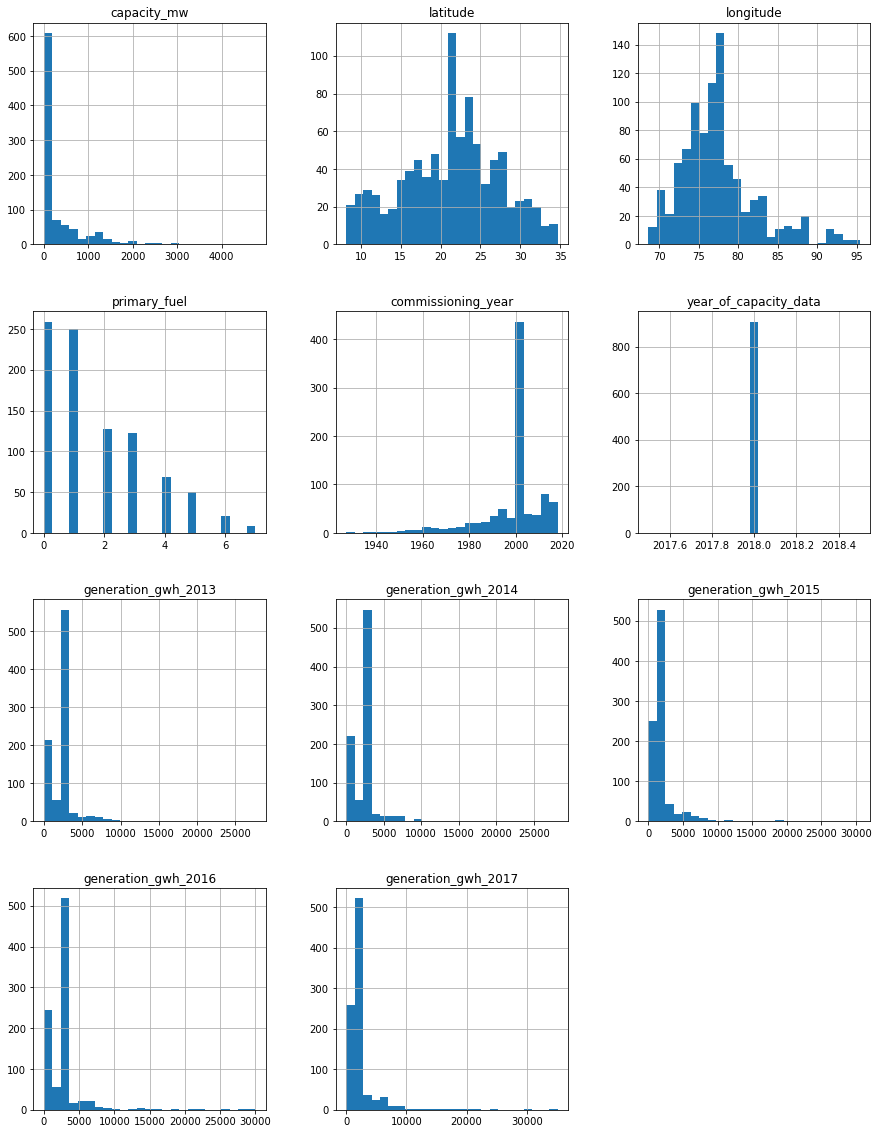

In [28]:
#Visualising the the feature on that of the label
data.hist(figsize=(15,20) , bins = 25)
plt.show()

In [29]:
X = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']

In [ ]:
#Lets check the multicollinearity on dependent variables. Before that we should scale our data.

In [30]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,2.685101,capacity_mw
1,1.011656,latitude
2,1.082921,longitude
3,1.065930,commissioning_year
4,NaN,year_of_capacity_data
5,15.734338,generation_gwh_2013
6,34.061655,generation_gwh_2014
7,27.856054,generation_gwh_2015
8,34.186605,generation_gwh_2016
9,16.048696,generation_gwh_2017


In [34]:
data=data.drop('generation_gwh_2014',axis=1)

In [35]:
data=data.drop('generation_gwh_2016',axis=1)

In [36]:
X = data.drop(columns=['primary_fuel'])
y= data['primary_fuel']

In [37]:
#Lets check the multicollinearity on dependent variables now. Before that we should scale our data.

In [38]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,2.680337,capacity_mw
1,1.009456,latitude
2,1.079395,longitude
3,1.060824,commissioning_year
4,NaN,year_of_capacity_data
5,5.143941,generation_gwh_2013
6,11.453530,generation_gwh_2015
7,8.485599,generation_gwh_2017


In [ ]:
#vif values are better than before. Now we will proceed for model building

# logistic regression

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Lets see how well our model performs on the test dataset

In [44]:
y_pred = log_reg.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6079295154185022

# Confusion metrix

In [47]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[46,  8,  6,  1,  0,  0,  0,  0],
       [ 9, 47,  4,  7,  2,  0,  0,  1],
       [ 0,  0, 22, 11,  0,  0,  0,  0],
       [ 0,  0,  6, 21,  0,  0,  0,  0],
       [ 3, 14,  0,  4,  1,  0,  0,  0],
       [ 1,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [48]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [49]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.8454545454545455

In [50]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8518518518518519

In [51]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8363636363636363

In [52]:
#F1 score
F1_score = 2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8440366972477065

# KNN Model

In [54]:
#Lets fit the data into Knn model and see how well it performs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(x_test)

In [56]:
knn.score(x_train,y_train)

0.7988252569750367

In [57]:
print("The accuracy score is : ",accuracy_score(y_test,y_pred))

The accuracy score is :  0.7444933920704846


# lets try to increase accuracy by using hyperparameter tuning

In [59]:
param_grid = {'algorithm' : ['ball_tree','kd_tree','brute'],
              'leaf_size' : [18,20,25,27,30,32,34],
              'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [60]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [61]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.693, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.743, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.676, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.691, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.635, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.654, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.628, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.721, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.618, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.743, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.625, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   15.1s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [62]:
#Lets see the best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [63]:
#we will use these parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'ball_tree',leaf_size = 18, n_neighbors = 3)

In [64]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=3)

In [65]:
knn.score(x_train,y_train)

0.8414096916299559

In [66]:
knn.score(x_test,y_test)

0.7400881057268722

# Random forest model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rand_clf = RandomForestClassifier(random_state=45)

In [69]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=45)

In [70]:
rand_clf.score(x_test,y_test)

0.8061674008810573

In [ ]:
#hyper parameter tuning to improve the score

In [71]:
grid_param = {'n_estimators' : [90,100,115,130],
              'criterion' : ['gini','entropy'],
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split' : range(2,10,1),
              'max_features' : ['auto','log2']
              }

In [72]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose = 3)

In [73]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 16.7min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [74]:
grid_search.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [75]:
rand_clf = RandomForestClassifier(criterion='gini',
                                 max_features = 'log2',
                                 min_samples_leaf= 1,
                                 min_samples_split=2,
                                 n_estimators= 130, random_state=41)

In [76]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=130, random_state=41)

In [77]:
rand_clf.score(x_test,y_test)

0.7973568281938326

In [ ]:
# The score has decreased after hyper paramete tuning.

# So the best model we have built is of random forest after hyper parameter tuning

In [78]:
import pickle
Global_power_plant = 'finalized_model.pickle'
pickle.dump(rand_clf,open(Global_power_plant,'wb'))

# Saved the model